<h1><center>Heart Disease Prediction</center></h1>


# <code style="background:PowderBlue;color:black"> Problem Statement
### Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

### <code style="background:Lavender;color:black">Importing Necessary Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <code style="background:Lavender;color:black">Reading the Dataset

In [225]:
heart_df=pd.read_csv("Heart Disease data.csv")

In [226]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [227]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [228]:
heart_df.shape

(1025, 14)

> ### The dataset contains 1025 rows and 14 columns

In [229]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [230]:
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### <code style="background:Lavender;color:black">Checking Null values

In [231]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> ### There are no null values in the dataset

### <code style="background:Lavender;color:black">EDA (Exploratory Data Analysis)


In [232]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [233]:
heart_df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### Correlation between features

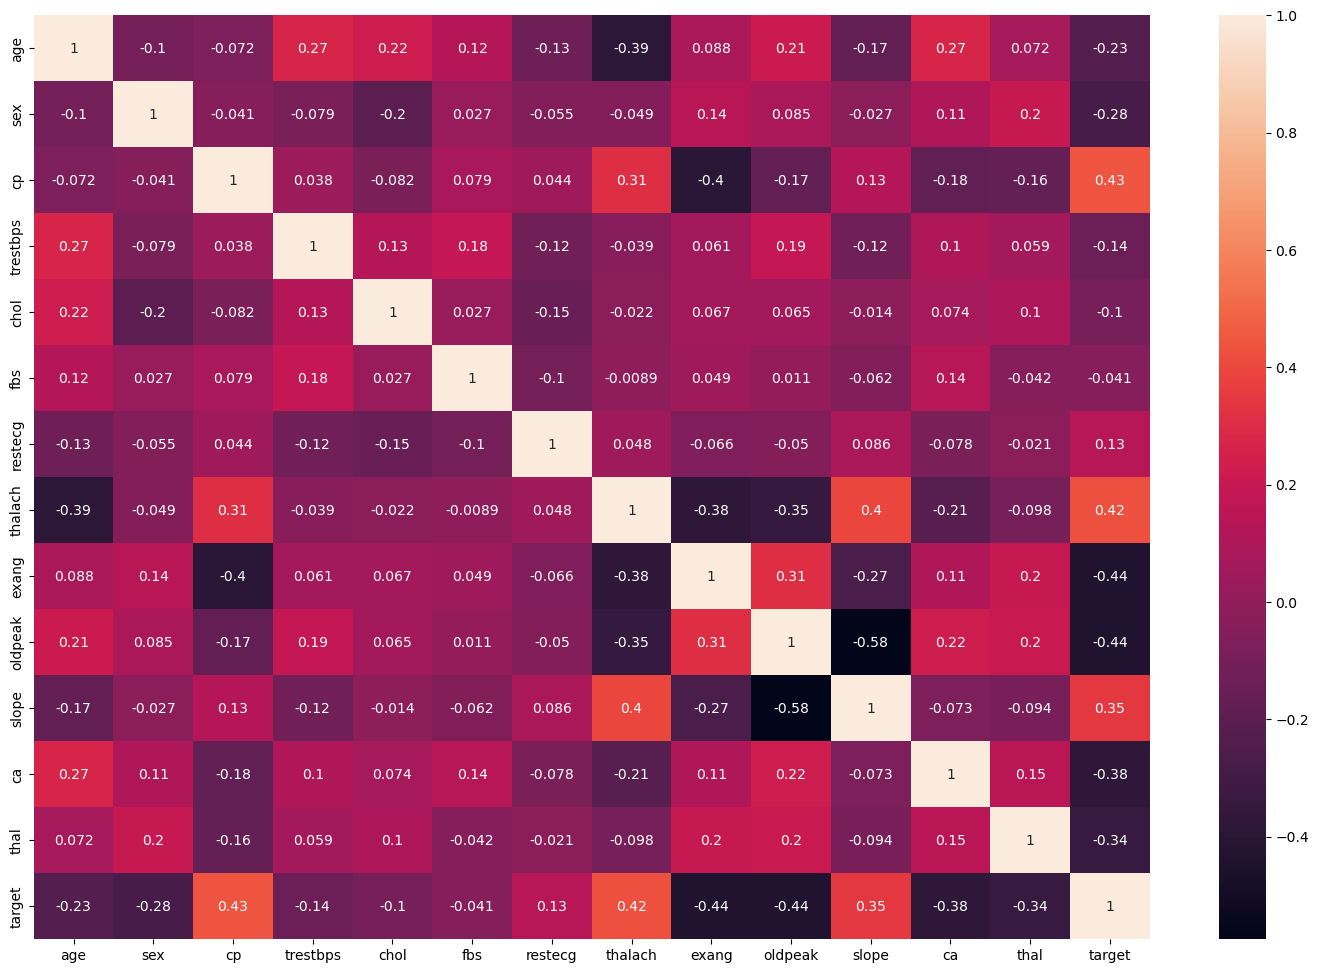

In [234]:
plt.figure(figsize=(18,12))
sns.heatmap(heart_df.corr(),annot=True)
plt.show()

> ### The features 'cp','restecg','thalach','slope' are positively correlated with the target variable


### Checking disease based on age

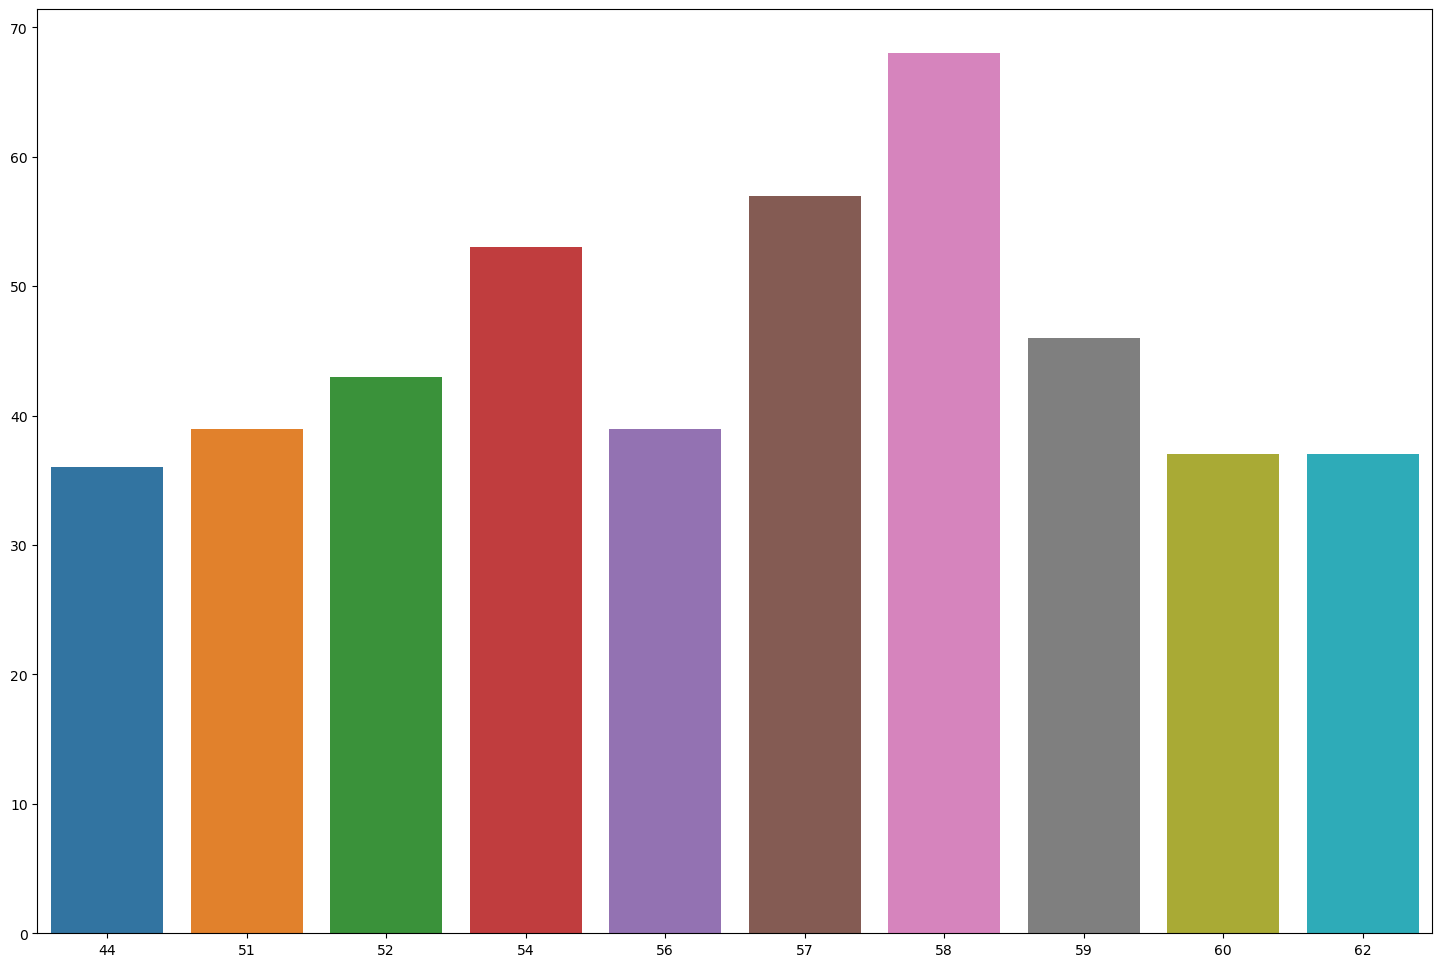

In [235]:
plt.figure(figsize=(18,12))
sns.barplot(x=heart_df.age.value_counts()[:10].index,y=heart_df.age.value_counts()[:10].values)
plt.show()

> ### People at the age of 58 has highest frequency

<Axes: xlabel='target', ylabel='count'>

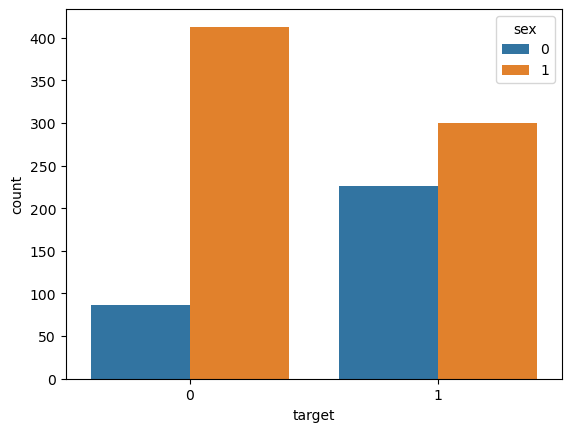

In [236]:
sns.countplot(x=heart_df['target'],hue='sex',data=heart_df)

> ### Men are majorily having Heart Disease compared to females

<Axes: xlabel='target', ylabel='count'>

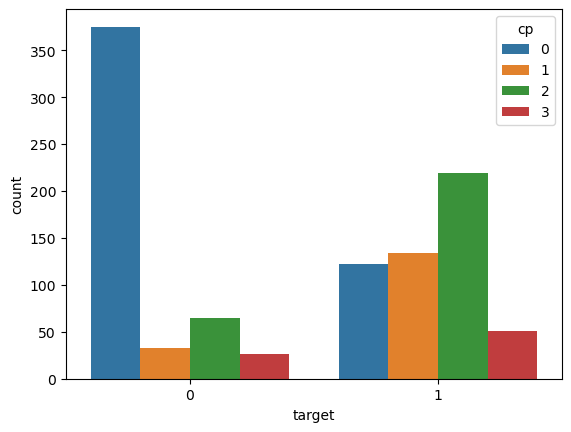

In [237]:
sns.countplot(x=heart_df['target'],hue='cp',data=heart_df)


<Axes: xlabel='sex', ylabel='chol'>

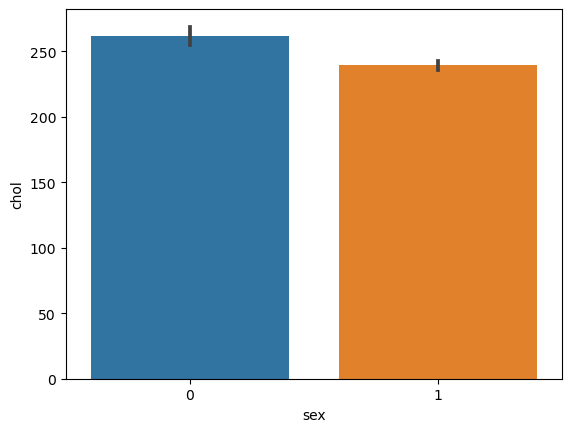

In [238]:
sns.barplot(x=heart_df['sex'],y=heart_df['chol'],data=heart_df)

> ### Women are having high cholestrol levels compared to men

<Axes: xlabel='target', ylabel='trestbps'>

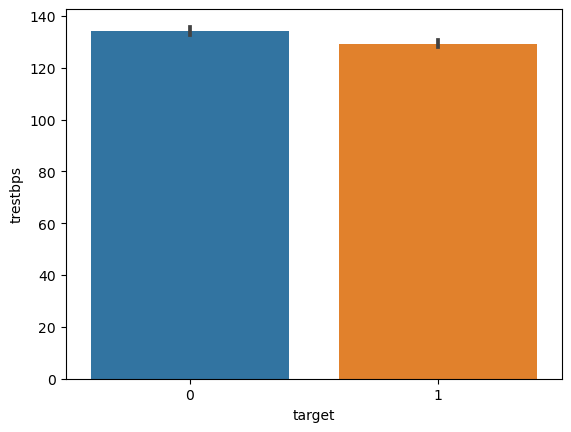

In [239]:
sns.barplot(x=heart_df['target'],y=heart_df['trestbps'],data=heart_df)

<Axes: xlabel='age', ylabel='trestbps'>

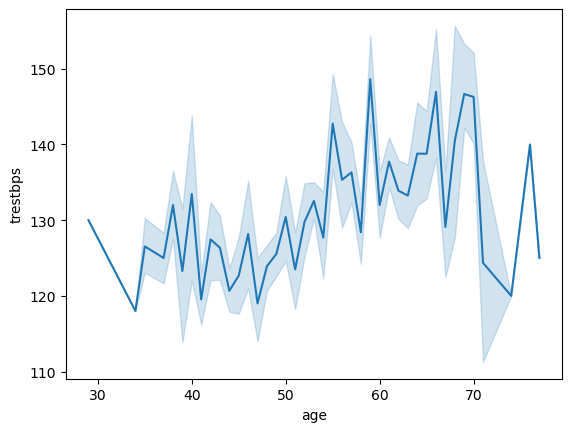

In [240]:
sns.lineplot(x=heart_df['age'],y=heart_df['trestbps'],data=heart_df)

> ### As Age increases BP also increases

<Axes: xlabel='age', ylabel='chol'>

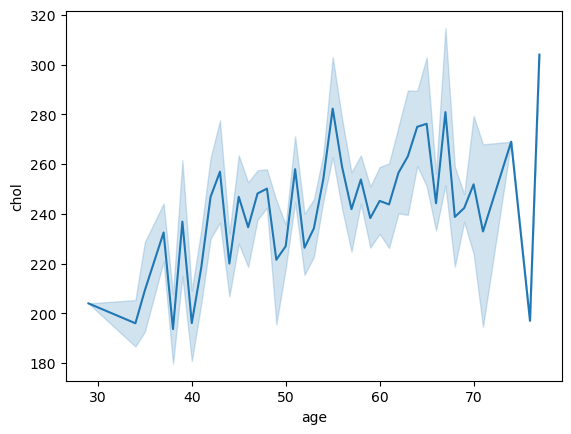

In [241]:
sns.lineplot(x=heart_df['age'],y=heart_df['chol'],data=heart_df)

> ### Cholestrol level increases as Age increases

### Heart Disease based on age

In [242]:
Young_Age = heart_df[(heart_df.age>=29)&(heart_df.age<40)]
Middle_Age = heart_df[(heart_df.age>=40)&(heart_df.age<55)]
Middle_Age = heart_df[(heart_df.age>55)]

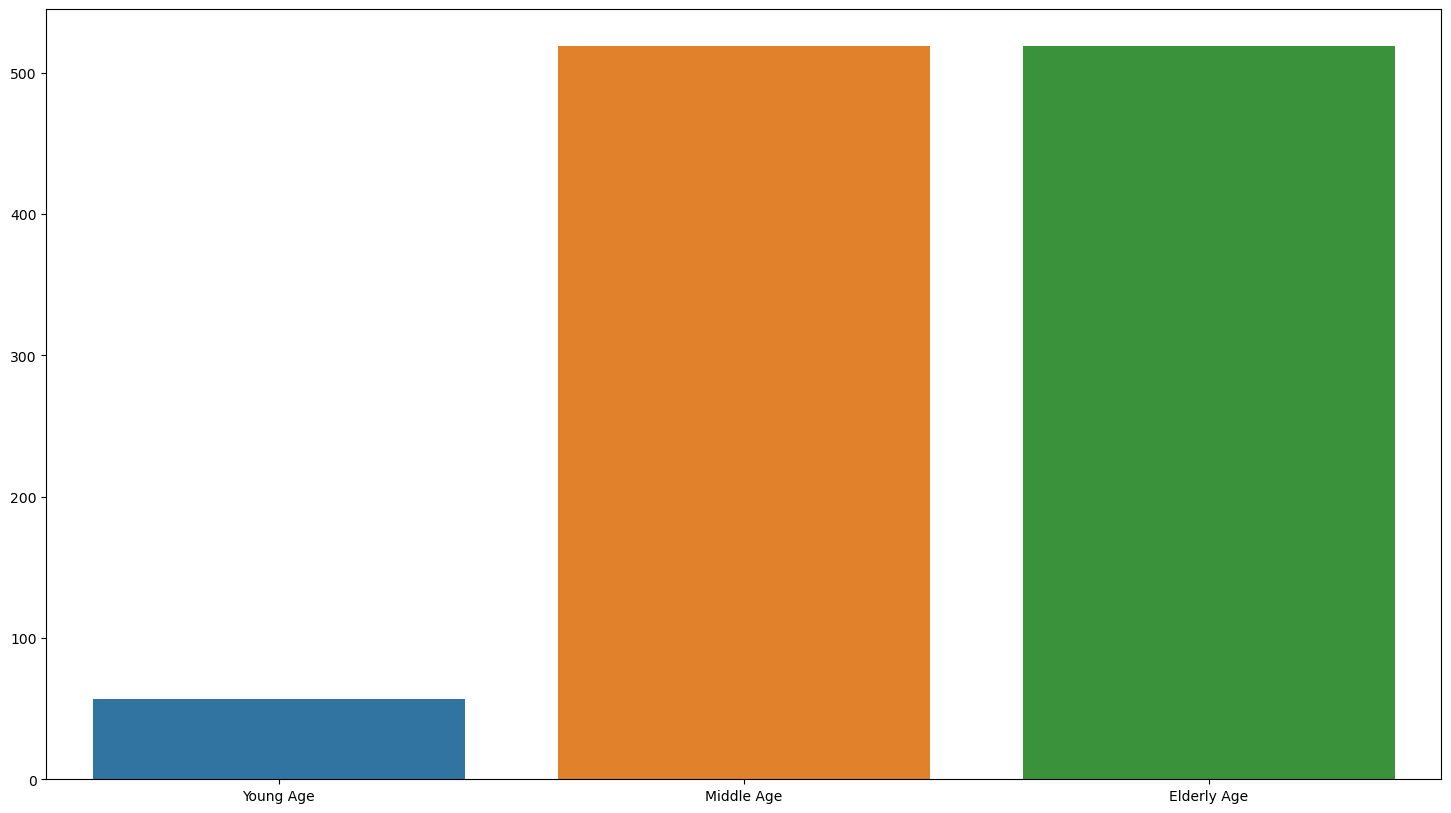

In [243]:
plt.figure(figsize=(18,10))
sns.barplot(x=['Young Age','Middle Age','Elderly Age'],y=[len(Young_Age),len(Middle_Age),len(Middle_Age)])
plt.show()


> ### Young Age group are least affected by heart disease and Elderly Age are mostly affected

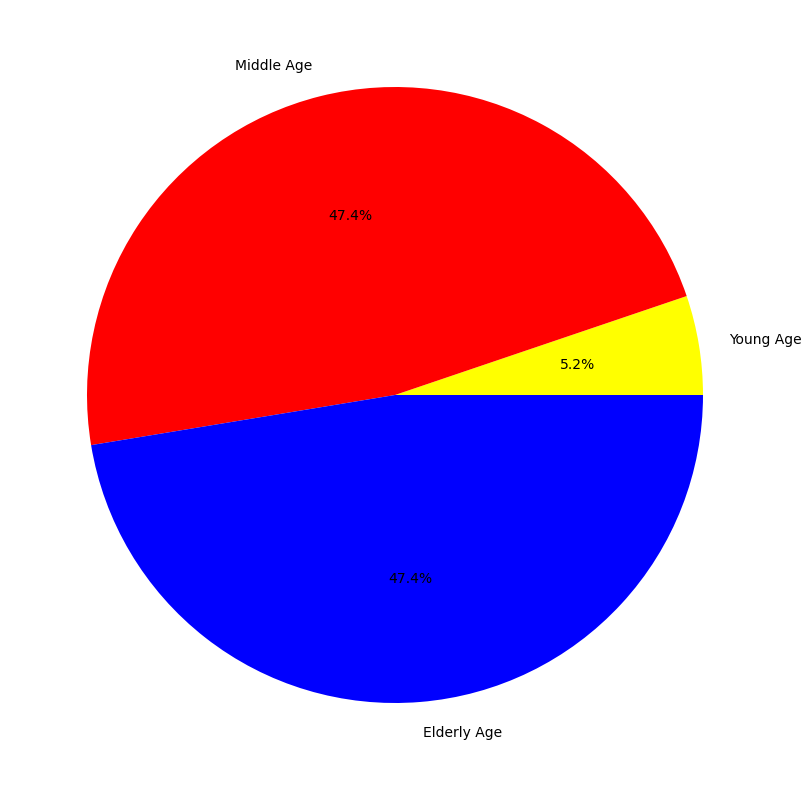

In [244]:
colors=['yellow','red','blue']
plt.figure(figsize=(18,10))
plt.pie([len(Young_Age),len(Middle_Age),len(Middle_Age)],labels=['Young Age','Middle Age','Elderly Age'],colors=colors, autopct='%1.1f%%')
plt.show()

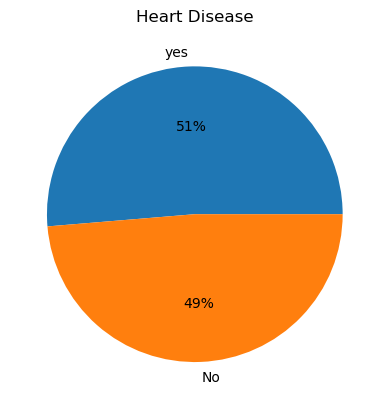

In [245]:
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

> ### The dataset is balanced as we can see from above plot

### <code style="background:Lavender;color:black">Train Test Split

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X = heart_df.drop('target',axis=1)
y = heart_df['target']



In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <code style="background:Lavender;color:black"> Feature Scaling

In [249]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler= scaler.fit_transform(X_test)

### <code style="background:Lavender;color:black">Linear Regression

In [250]:
from sklearn.linear_model import LinearRegression


In [251]:
lr= LinearRegression()
lr.fit(X_train_scaler, y_train)


LinearRegression()

In [252]:
y_pred_lr= lr.predict(X_test_scaler)
lr_accuracy=lr.score(X_test_scaler,y_test)
lr_accuracy

0.4256643425019452

### <code style="background:Lavender;color:black">Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression


In [254]:

log_r= LogisticRegression()
log_r.fit(X_train_scaler, y_train)


LogisticRegression()

In [255]:
y_pred_log= log_r.predict(X_test_scaler)
log_accuracy=log_r.score(X_test_scaler,y_test)
log_accuracy

0.7804878048780488

### <code style="background:Lavender;color:black">Decision Tree

In [256]:
from sklearn.tree import DecisionTreeClassifier


In [257]:
dt= DecisionTreeClassifier()
dt.fit(X_train_scaler, y_train)


DecisionTreeClassifier()

In [258]:
y_pred_dt= dt.predict(X_test_scaler)
dt_accuracy=dt.score(X_test_scaler,y_test)
dt_accuracy

0.9560975609756097

### <code style="background:Lavender;color:black">Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()


In [260]:
rf.fit(X_train_scaler, y_train)
y_pred_rf= rf.predict(X_test_scaler)
rf_accuracy=rf.score(X_test_scaler,y_test)
rf_accuracy

0.9853658536585366

### <code style="background:Lavender;color:black">SVM

In [261]:
from sklearn.svm import SVC

svm= SVC()


In [262]:
svm.fit(X_train_scaler, y_train)
y_pred_svm= svm.predict(X_test_scaler)
svm_accuracy=svm.score(X_test_scaler,y_test)
svm_accuracy

0.8926829268292683

### <code style="background:Lavender;color:black">Model Accuracy Comparision

In [263]:
models_accuracy=pd.DataFrame({'MODEL':['Linear Regression','Logistic Regression','Decision Tree','Random Forest Classifier','SVM'],
                             'ACCURACY':[lr_accuracy,log_accuracy,dt_accuracy,rf_accuracy,svm_accuracy]})

In [264]:
models_accuracy

,MODEL,ACCURACY
0,Linear Regression,0.425664
1,Logistic Regression,0.780488
2,Decision Tree,0.956098
3,Random Forest Classifier,0.985366
4,SVM,0.892683


# <code style="background:PowderBlue;color:black">Conclusion: 


### Random Forest Classifier performs better with high accuracy when compared with other models